<b><h2><center>ReneWind Project </center></h2></b>

<b><h2>Prepared by: Melissa Hills </h2></b>

<b><h2><center>![turbine](https://images.pexels.com/photos/3976320/pexels-photo-3976320.jpeg)</center></h2></b>

## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)

from sklearn import metrics

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

## Loading the dataset

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read original data
path2 = "/content/drive/MyDrive/UTAS/7Model_Tuning/Project_ReneWind/Train.csv"
df= pd.read_csv(path2)

# read test data
path1 = "/content/drive/MyDrive/UTAS/7Model_Tuning/Project_ReneWind/Test.csv"
dftest = pd.read_csv(path1)

## Data Overview

### Displaying first 5 rows of dataset

In [ ]:
# original dataset - first 5 rows of data
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [ ]:
# test dataset - first 5 rows of data
dftest.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


### Displaying shape of dataset

In [ ]:
# original dataset shape
df.shape

(20000, 41)

In [ ]:
# test shape
dftest.shape

(5000, 41)

### Data types of the columns

In [ ]:
# data types for original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

* all columns are numeric values

### Statistical summary of dataset

In [ ]:
# statistical summary for original dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


* Sensor scores can range from negative to positive values.
* Sensor V32 has the largest range from -19.877 to 23.633

### Target variable distribution

In [ ]:
# original dataset distribution of target variable
df['Target'].value_counts(normalize=True)

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64

In [ ]:
# test dataset distribution of target variable
dftest['Target'].value_counts(normalize=True)

Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64

* Dependent variable is definitely imbalanced. Only 5.6% have failures. Will need to take into account during model building and performance values.




### Checking for duplicate values

In [ ]:
# look for duplicate rows in train data file
df.duplicated().sum()

0

In [ ]:
# look for duplicate rows in test data file
dftest.duplicated().sum()

0

* There are no duplicate rows in either dataset.



### Missing values in original dataset


In [ ]:
# missing values in train data file
df.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [ ]:
# missing values in test data file
dftest.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

* only a few items are missing from sensor V1 and V2.

###  Unique values

In [ ]:
# check for unique values in columns.
df.nunique()

V1        19982
V2        19982
V3        20000
V4        20000
V5        20000
V6        20000
V7        20000
V8        20000
V9        20000
V10       20000
V11       20000
V12       20000
V13       20000
V14       20000
V15       20000
V16       20000
V17       20000
V18       20000
V19       20000
V20       20000
V21       20000
V22       20000
V23       20000
V24       20000
V25       20000
V26       20000
V27       20000
V28       20000
V29       20000
V30       20000
V31       20000
V32       20000
V33       20000
V34       20000
V35       20000
V36       20000
V37       20000
V38       20000
V39       20000
V40       20000
Target        2
dtype: int64

* As expected the sensors have very detailed accuracy. Thus all values are unique. We will keep all columns.

# Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(data, feature, figsize=(12, 5), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,5))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

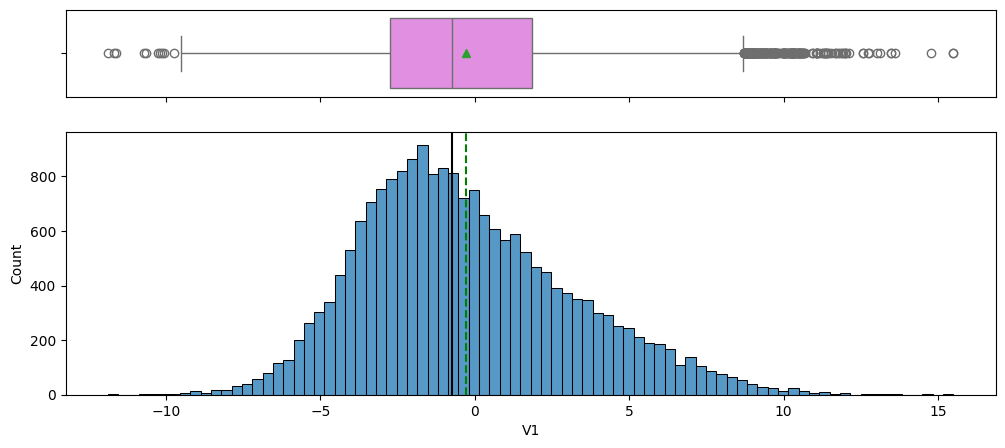

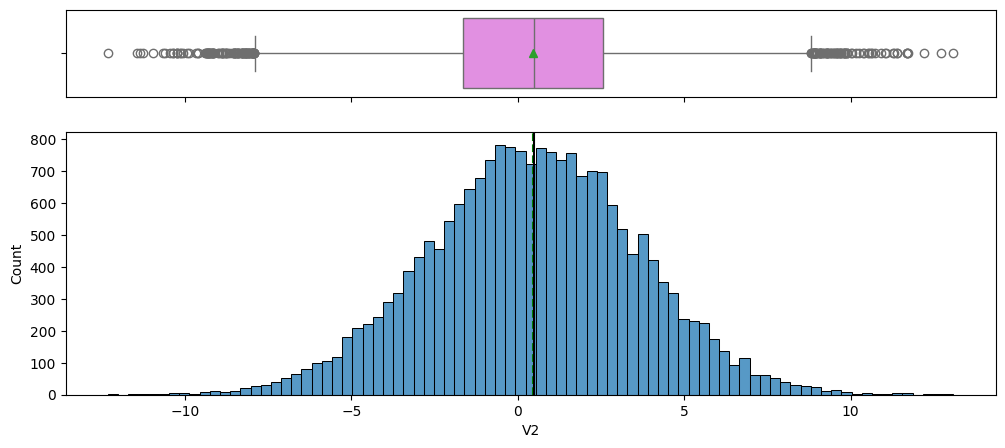

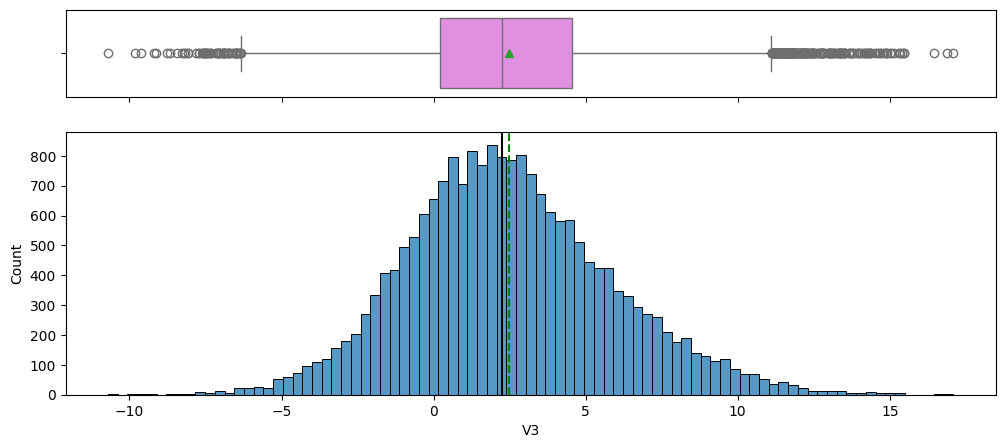

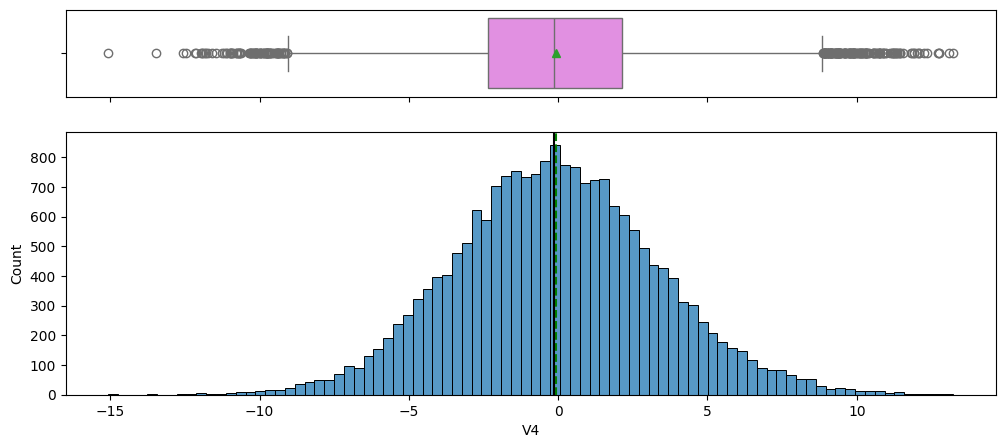

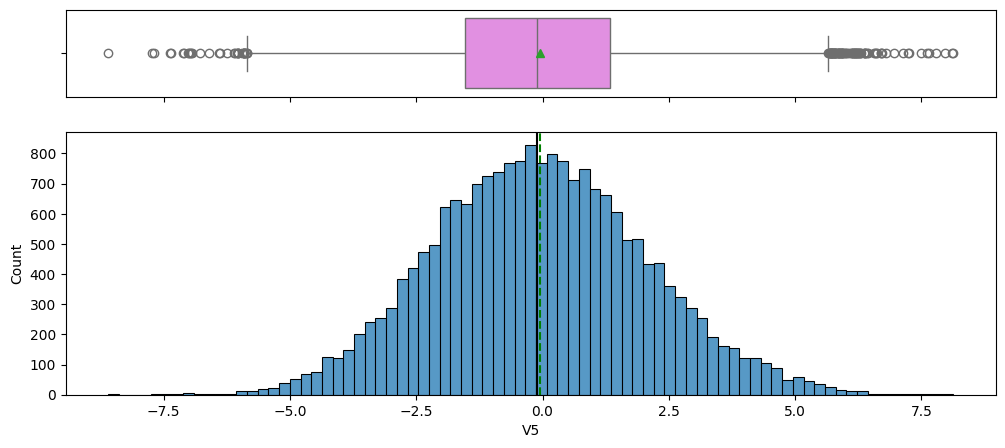

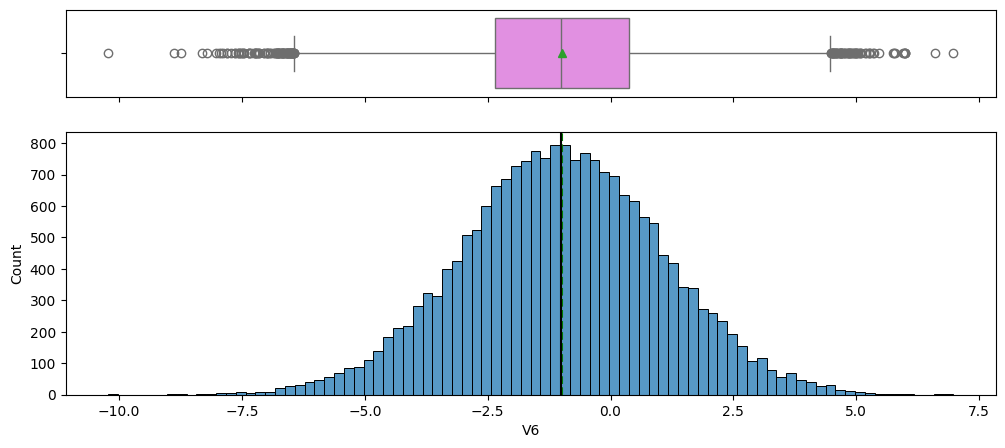

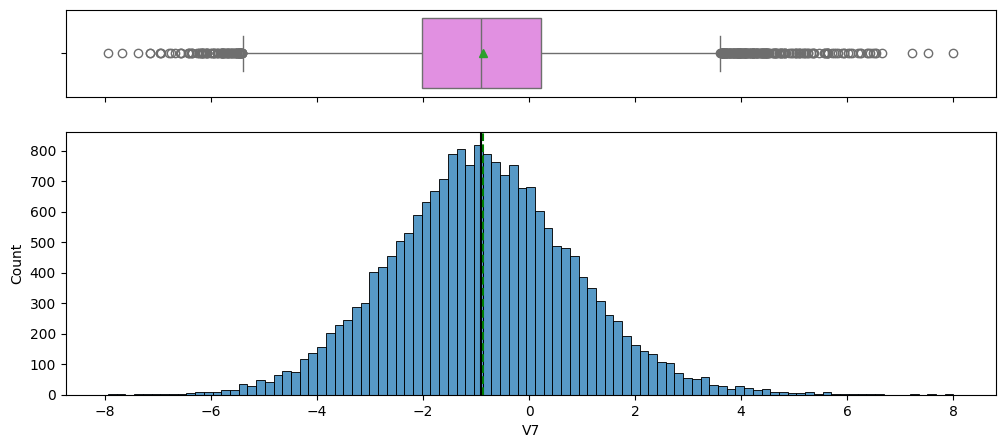

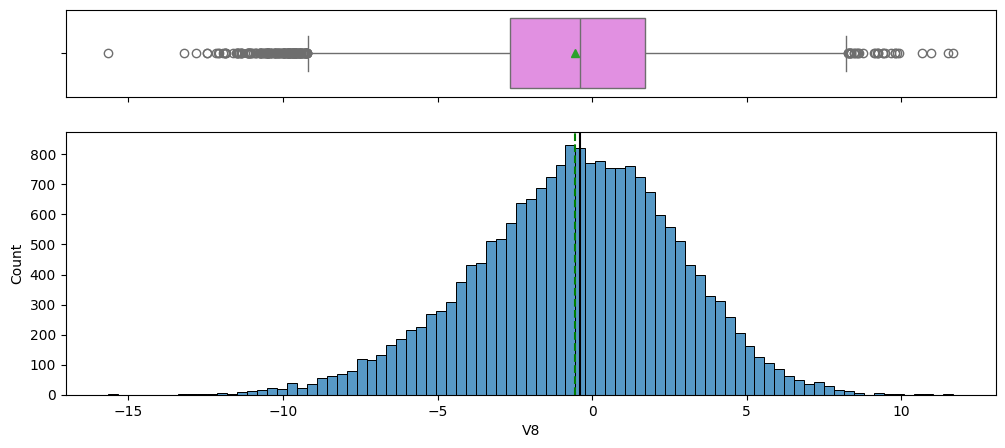

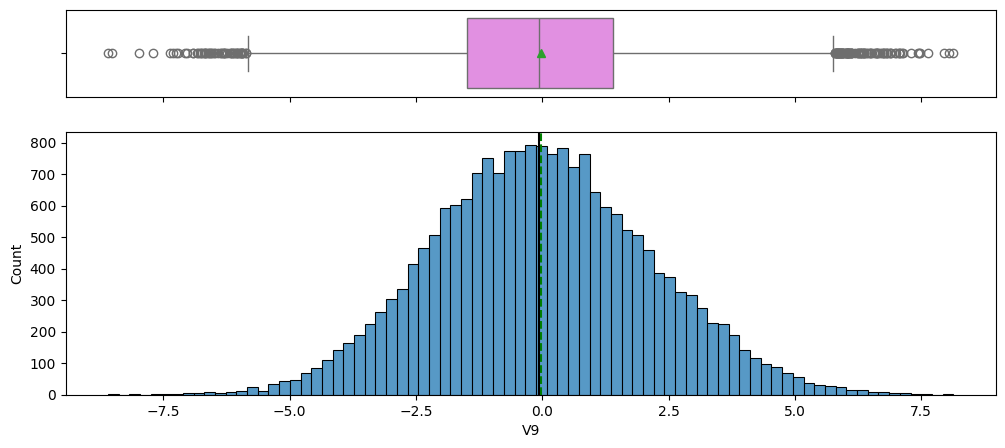

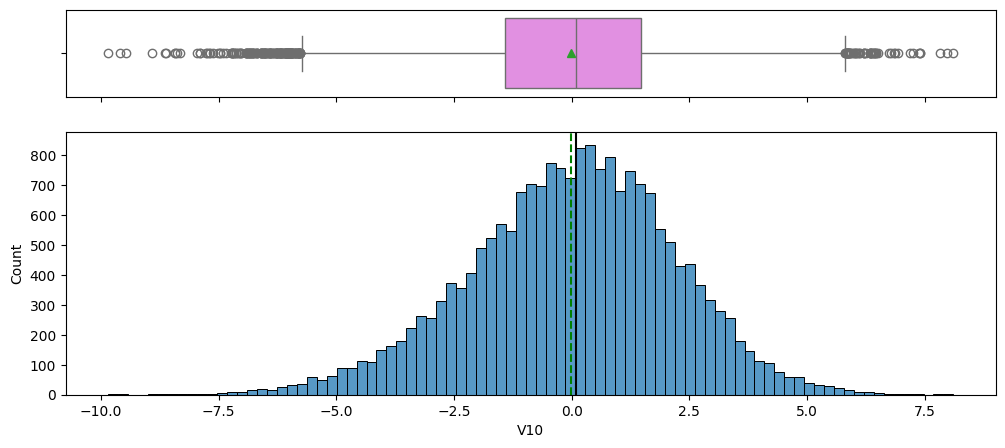

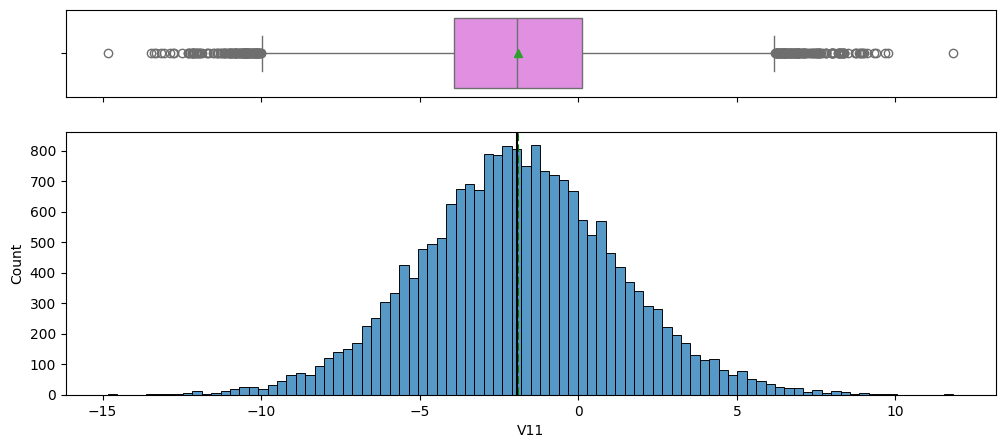

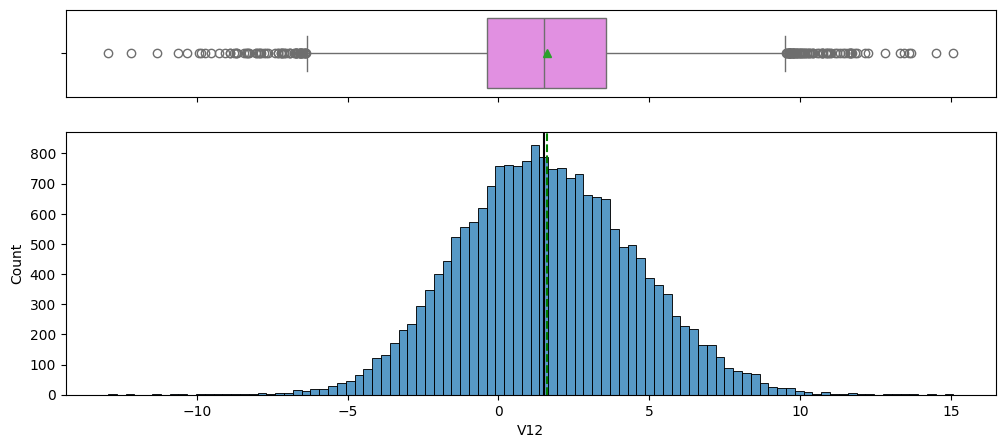

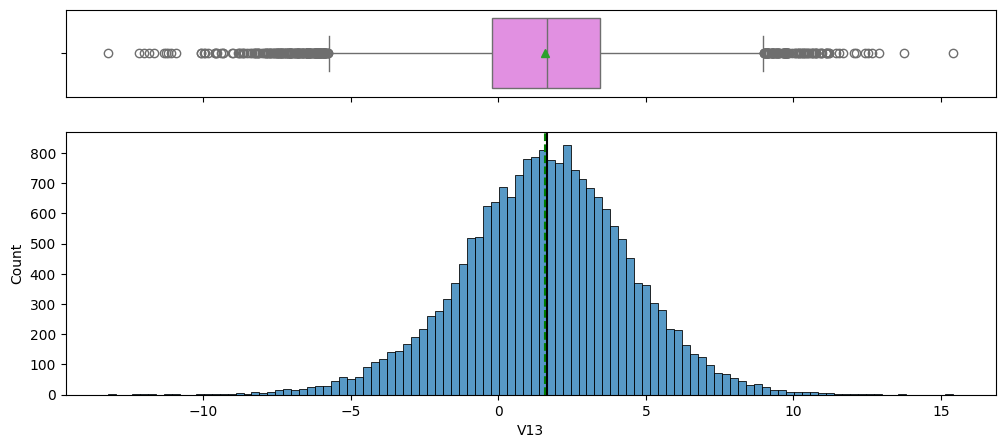

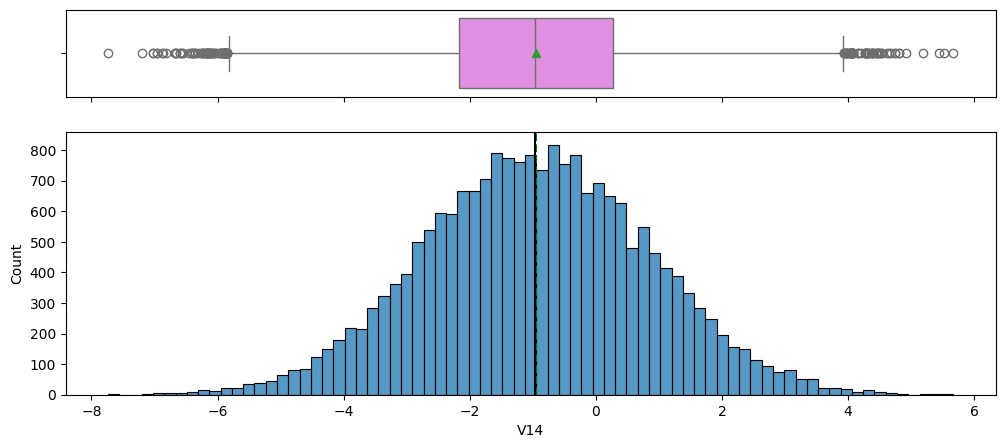

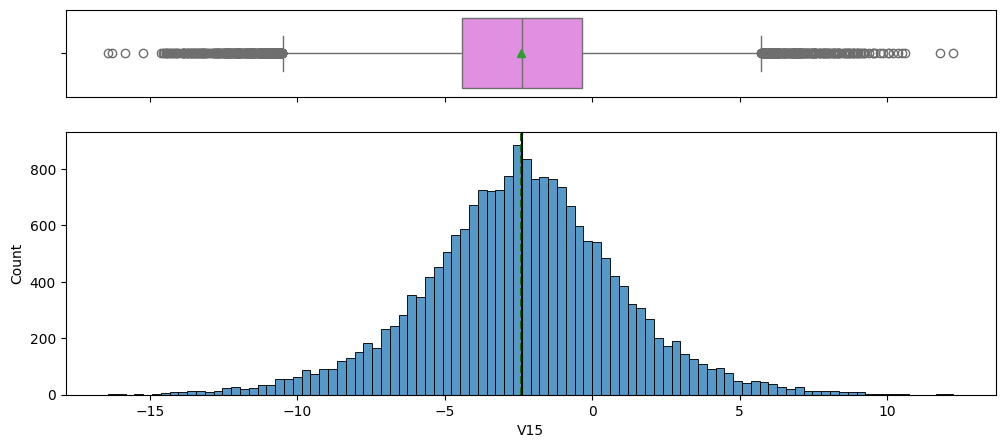

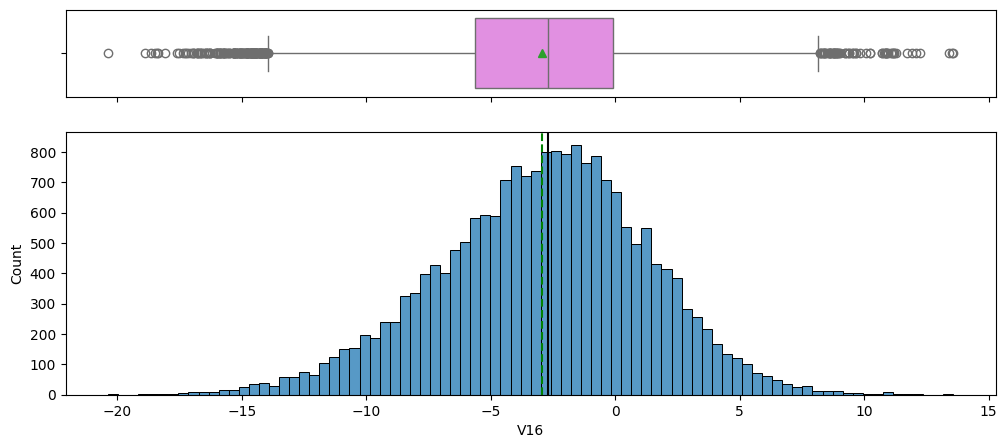

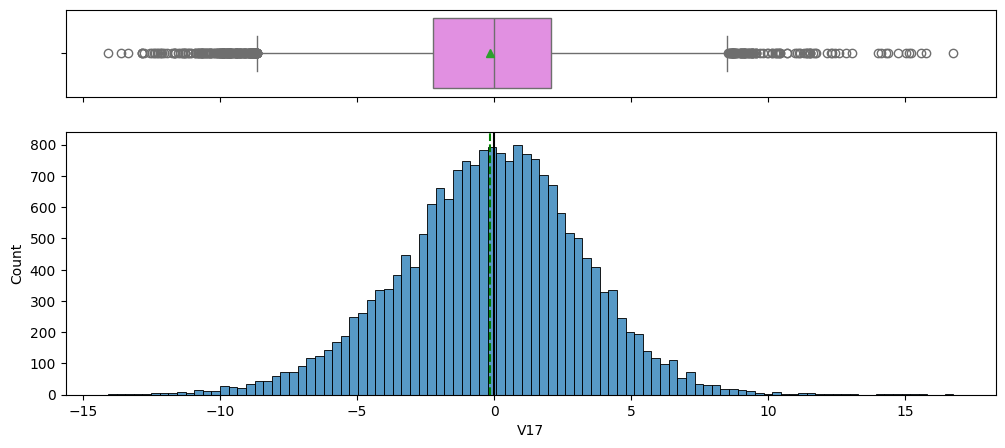

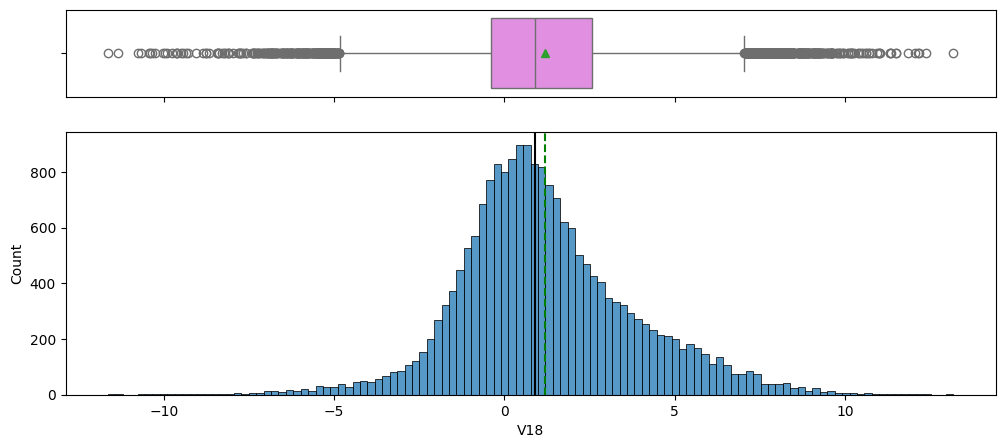

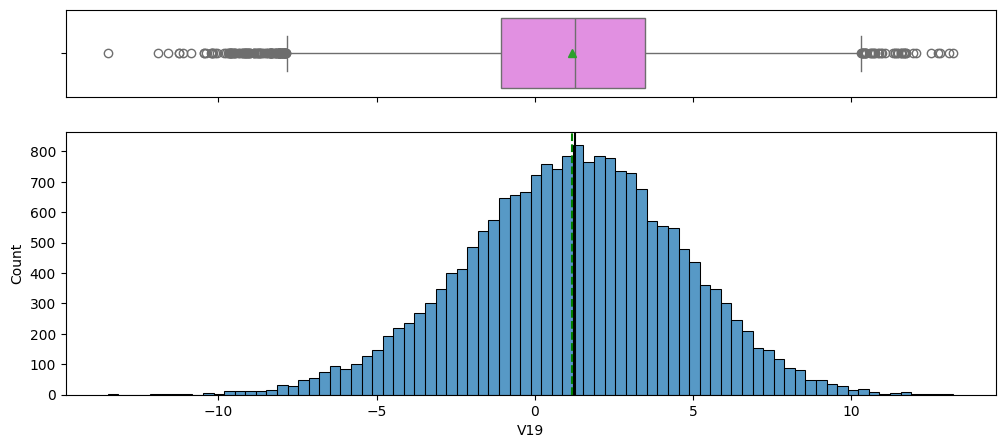

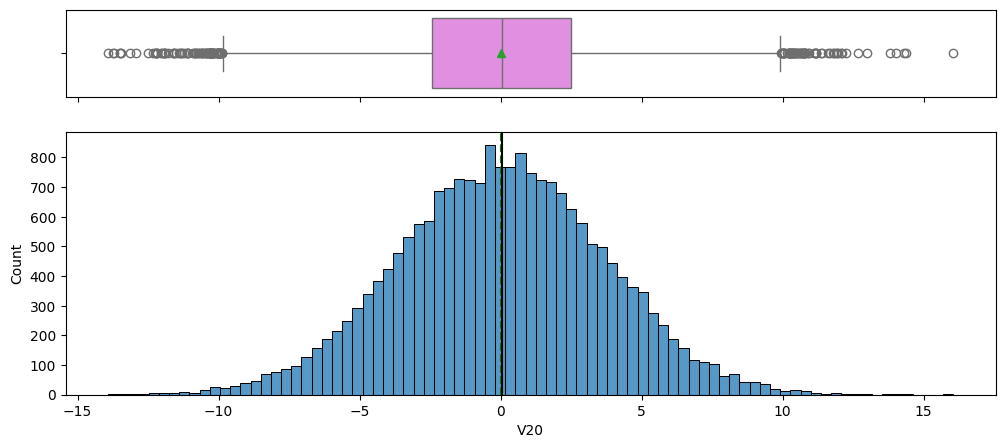

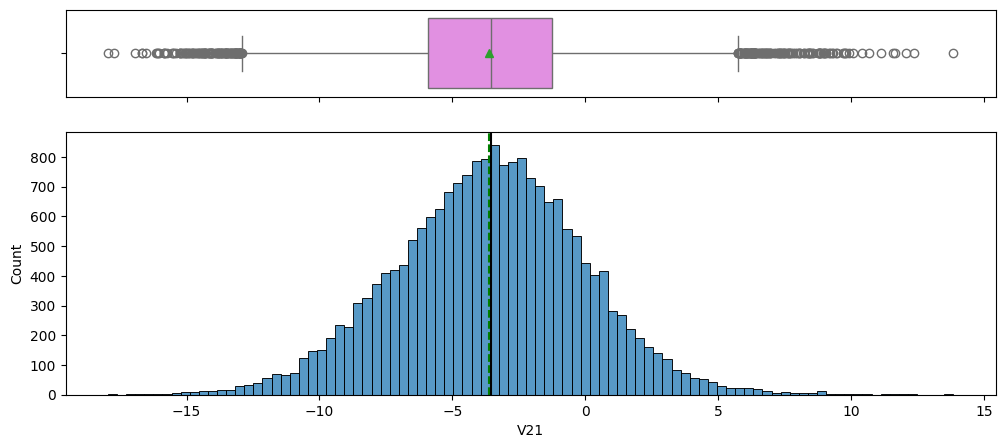

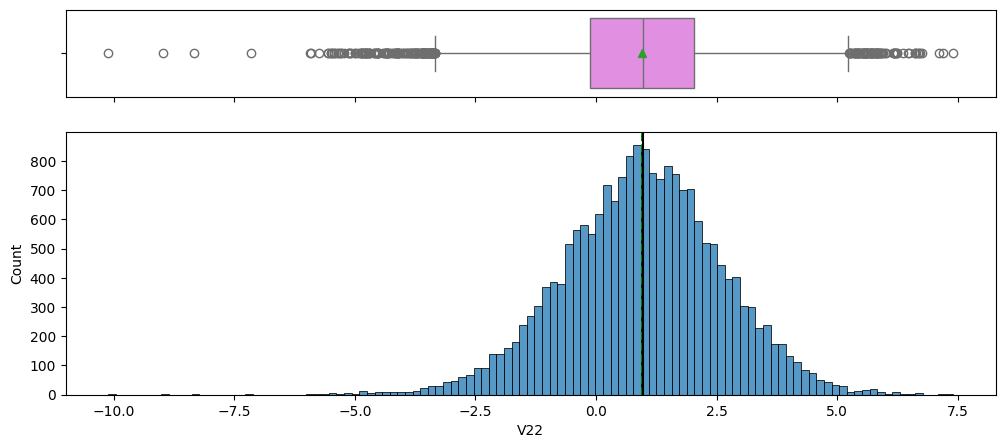

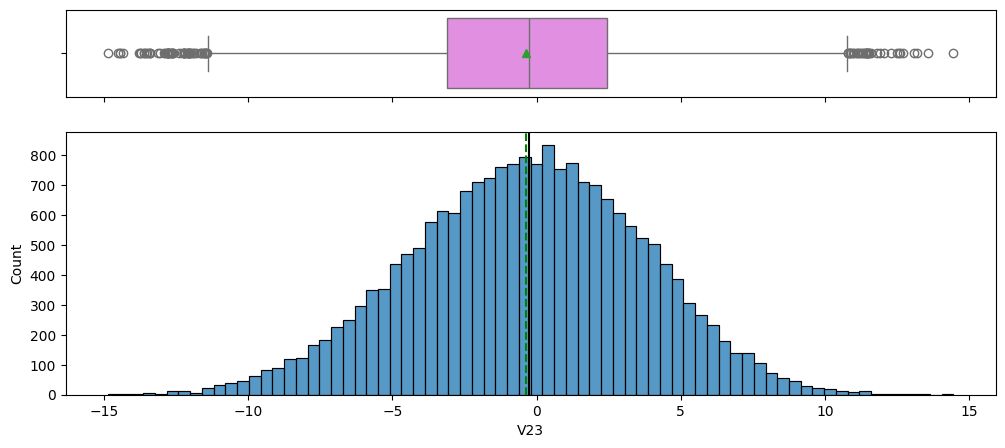

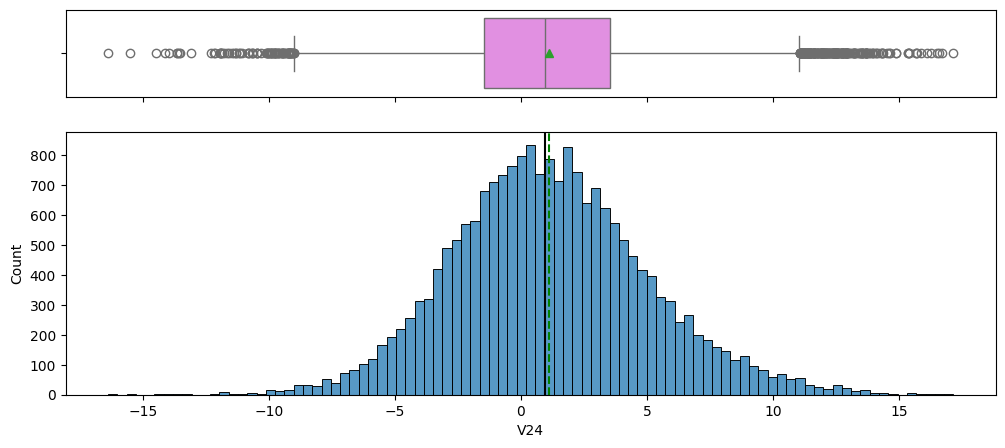

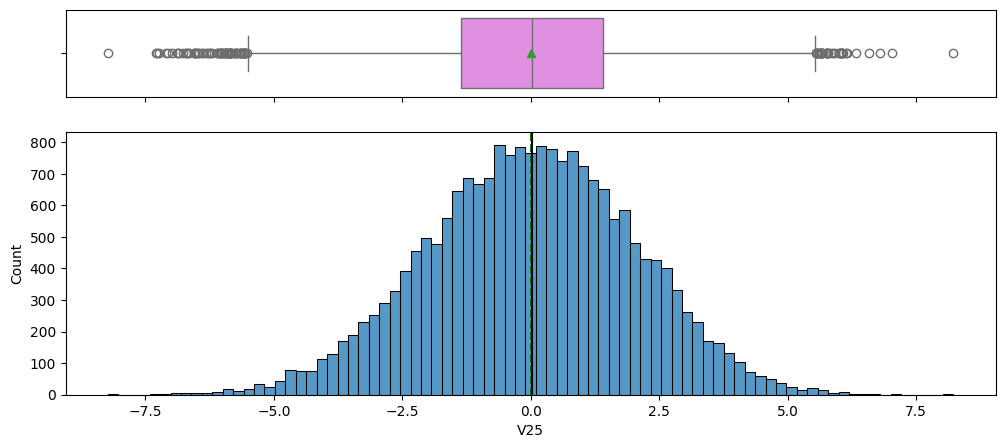

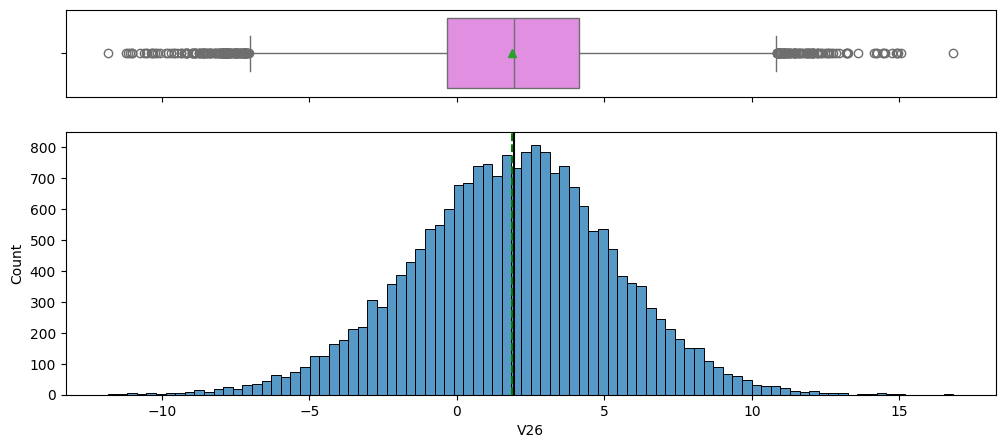

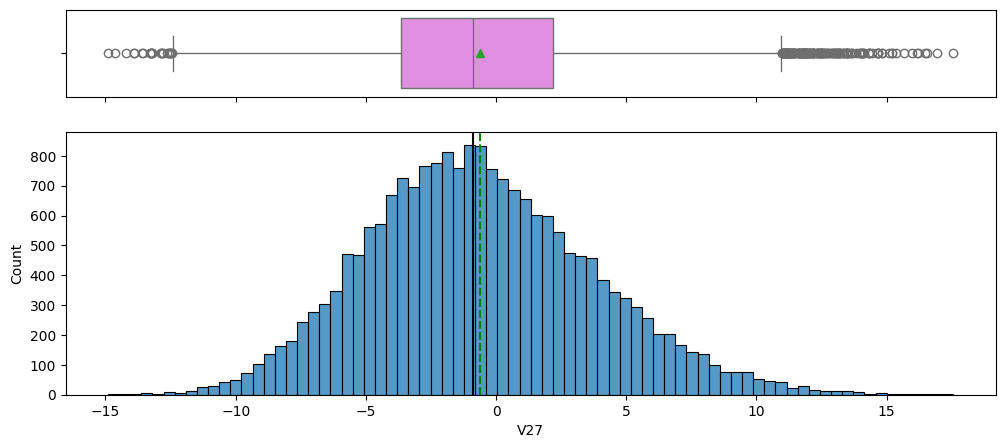

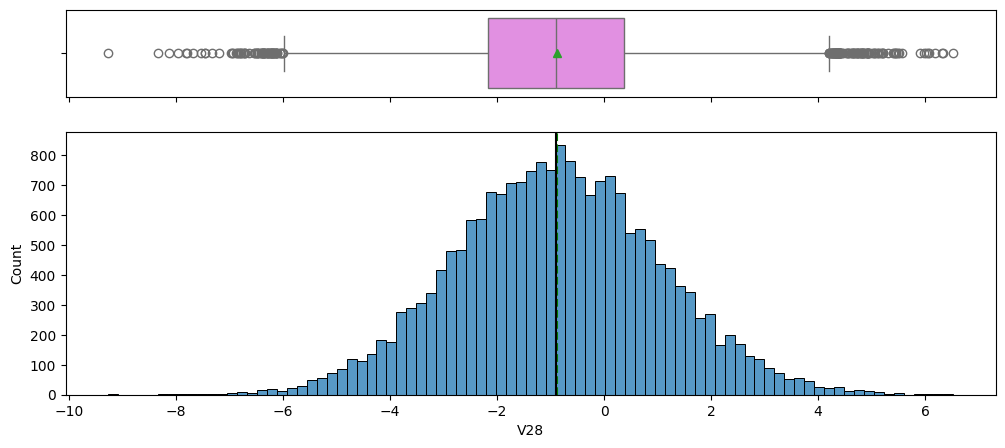

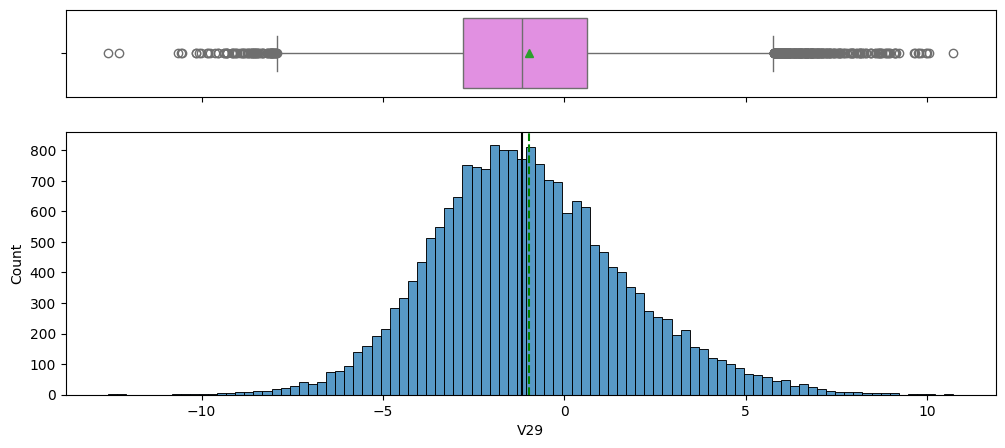

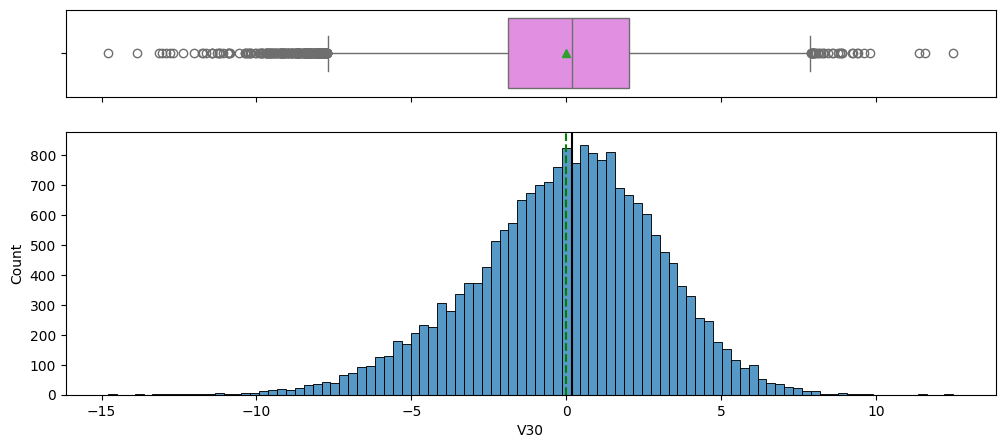

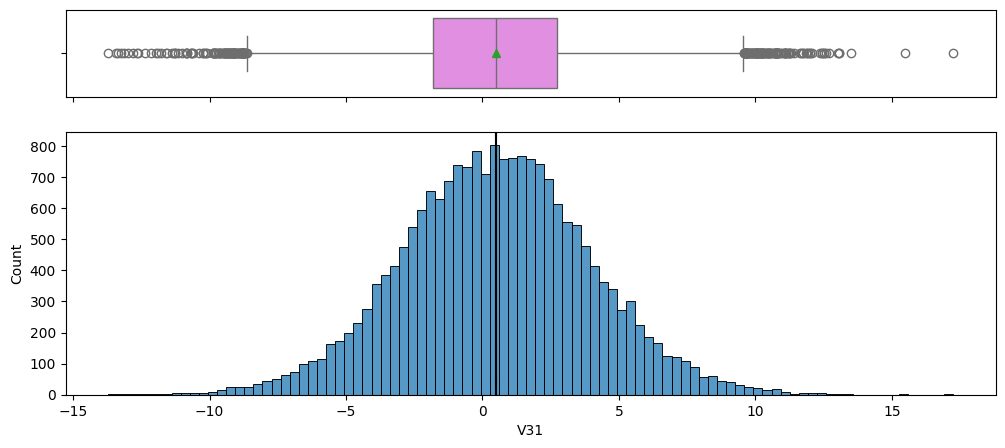

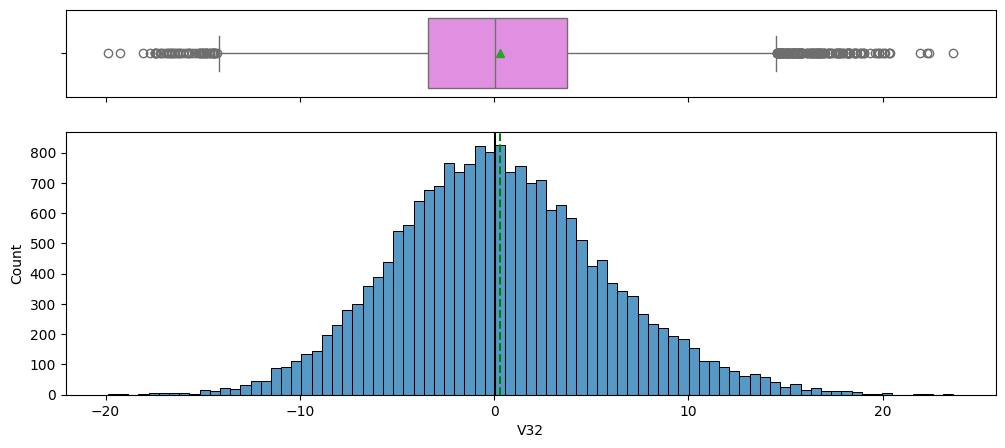

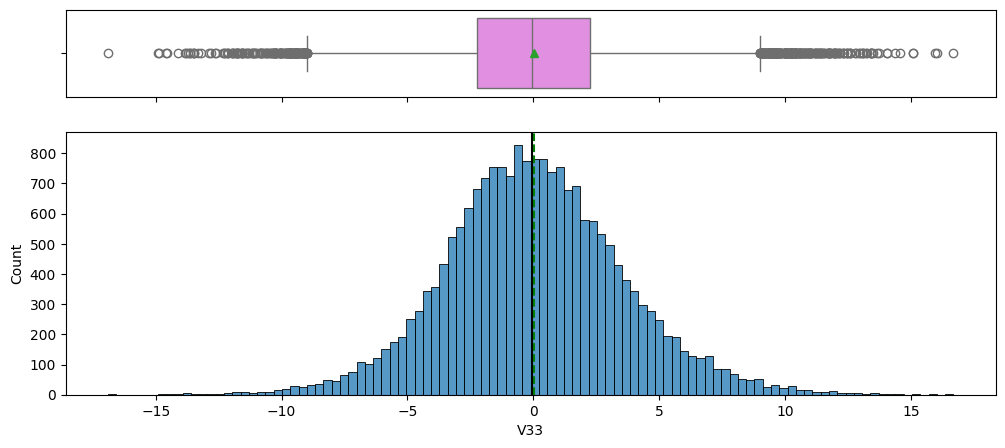

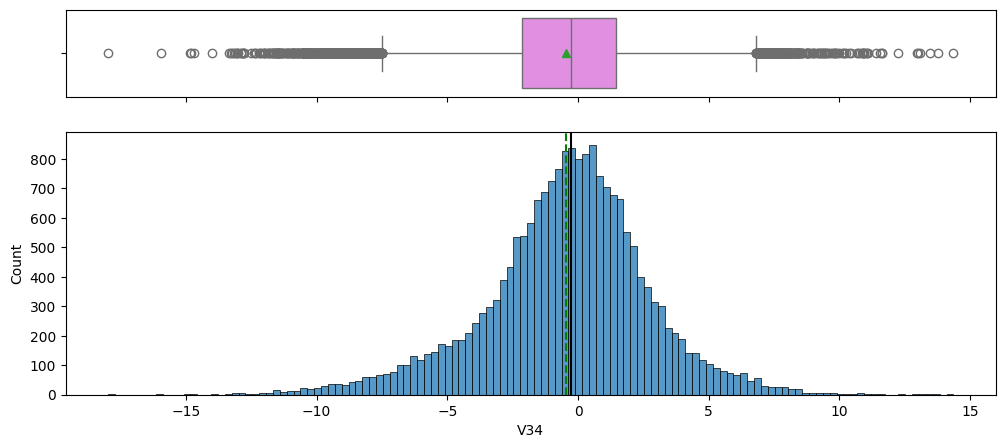

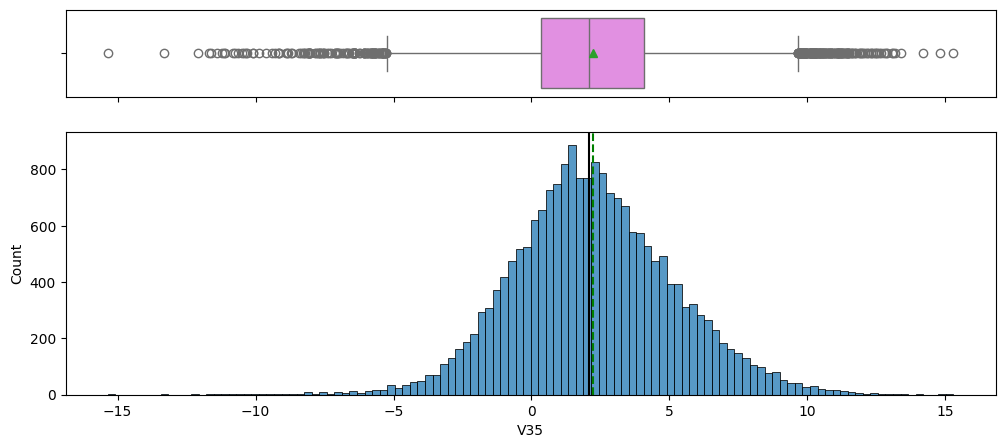

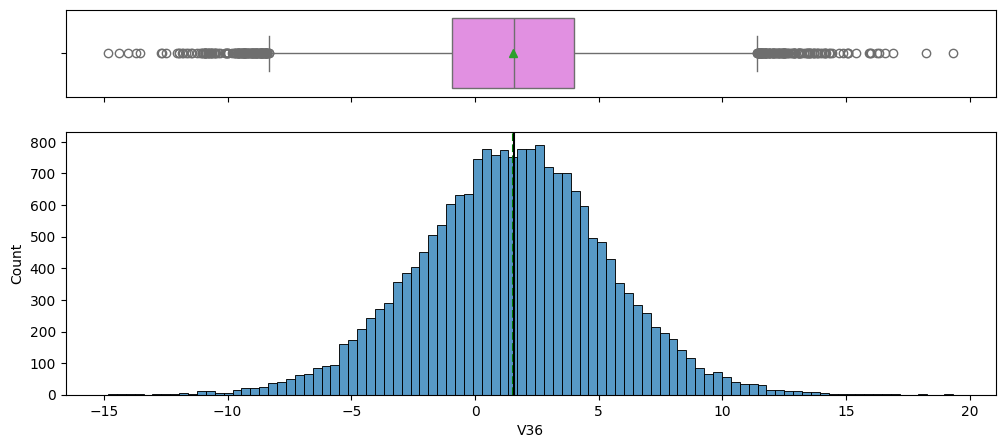

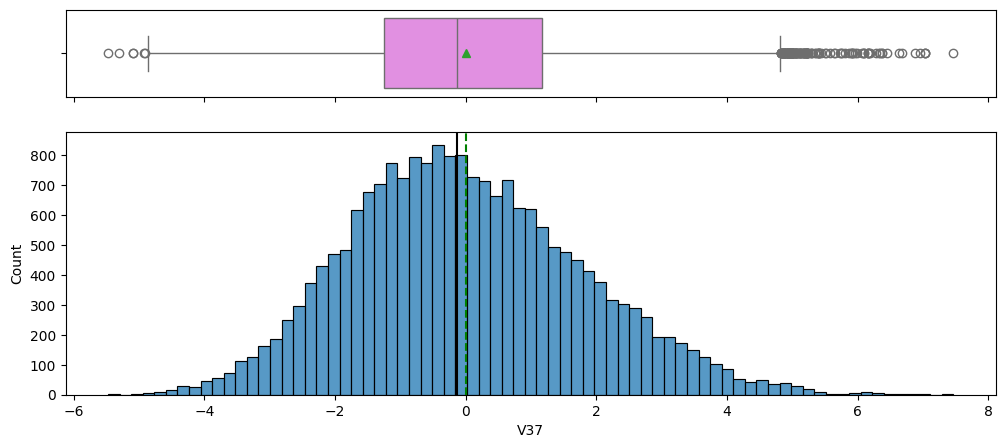

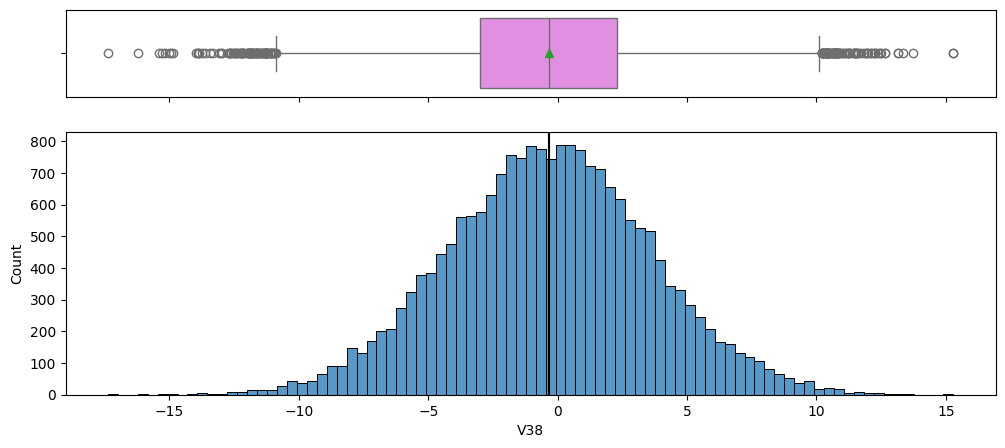

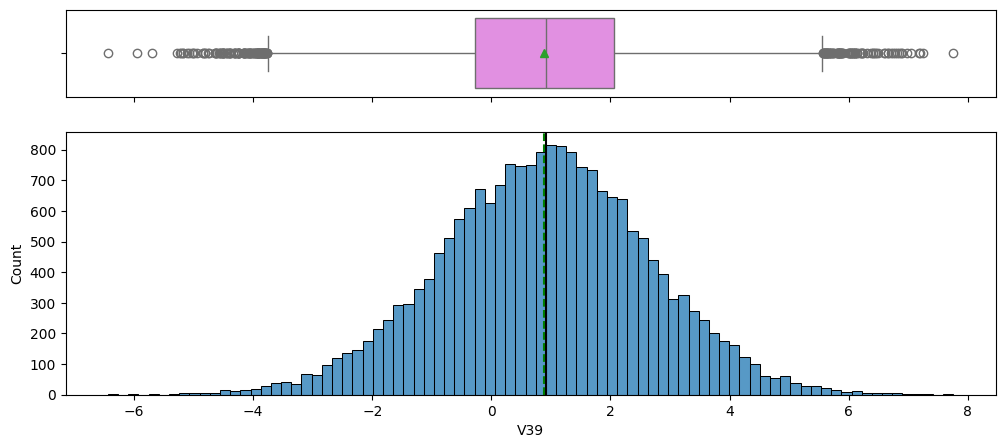

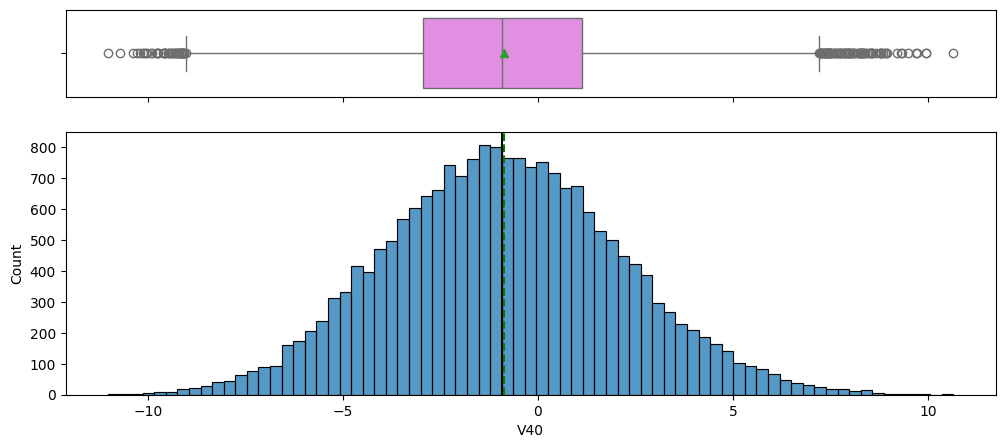

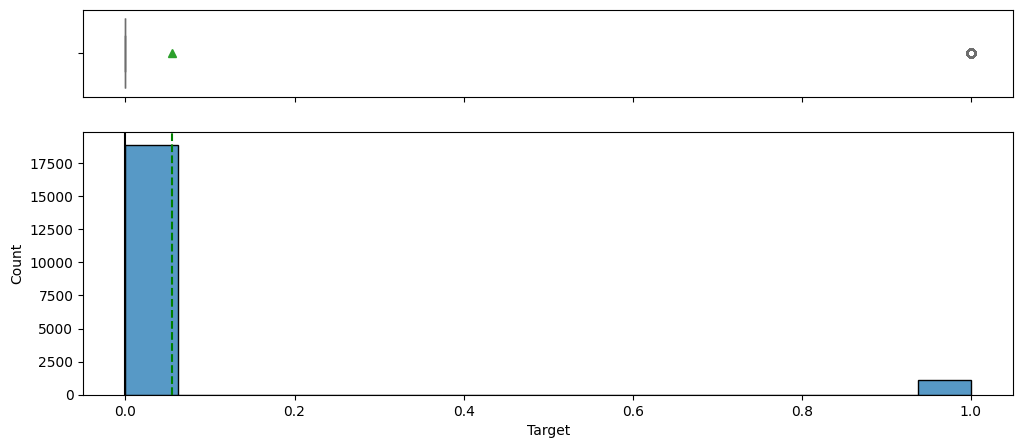

In [ ]:
# create histogram boxplot graph for all columns in original dataset
for i in df.columns:
    histogram_boxplot(df, i, figsize=(12, 5), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

Observations on Train Dataset:
* All sensors have normal distribution with outliers on left and right-hand sides.
* The target variable is imbalanced.

### Plotting all the features at one go

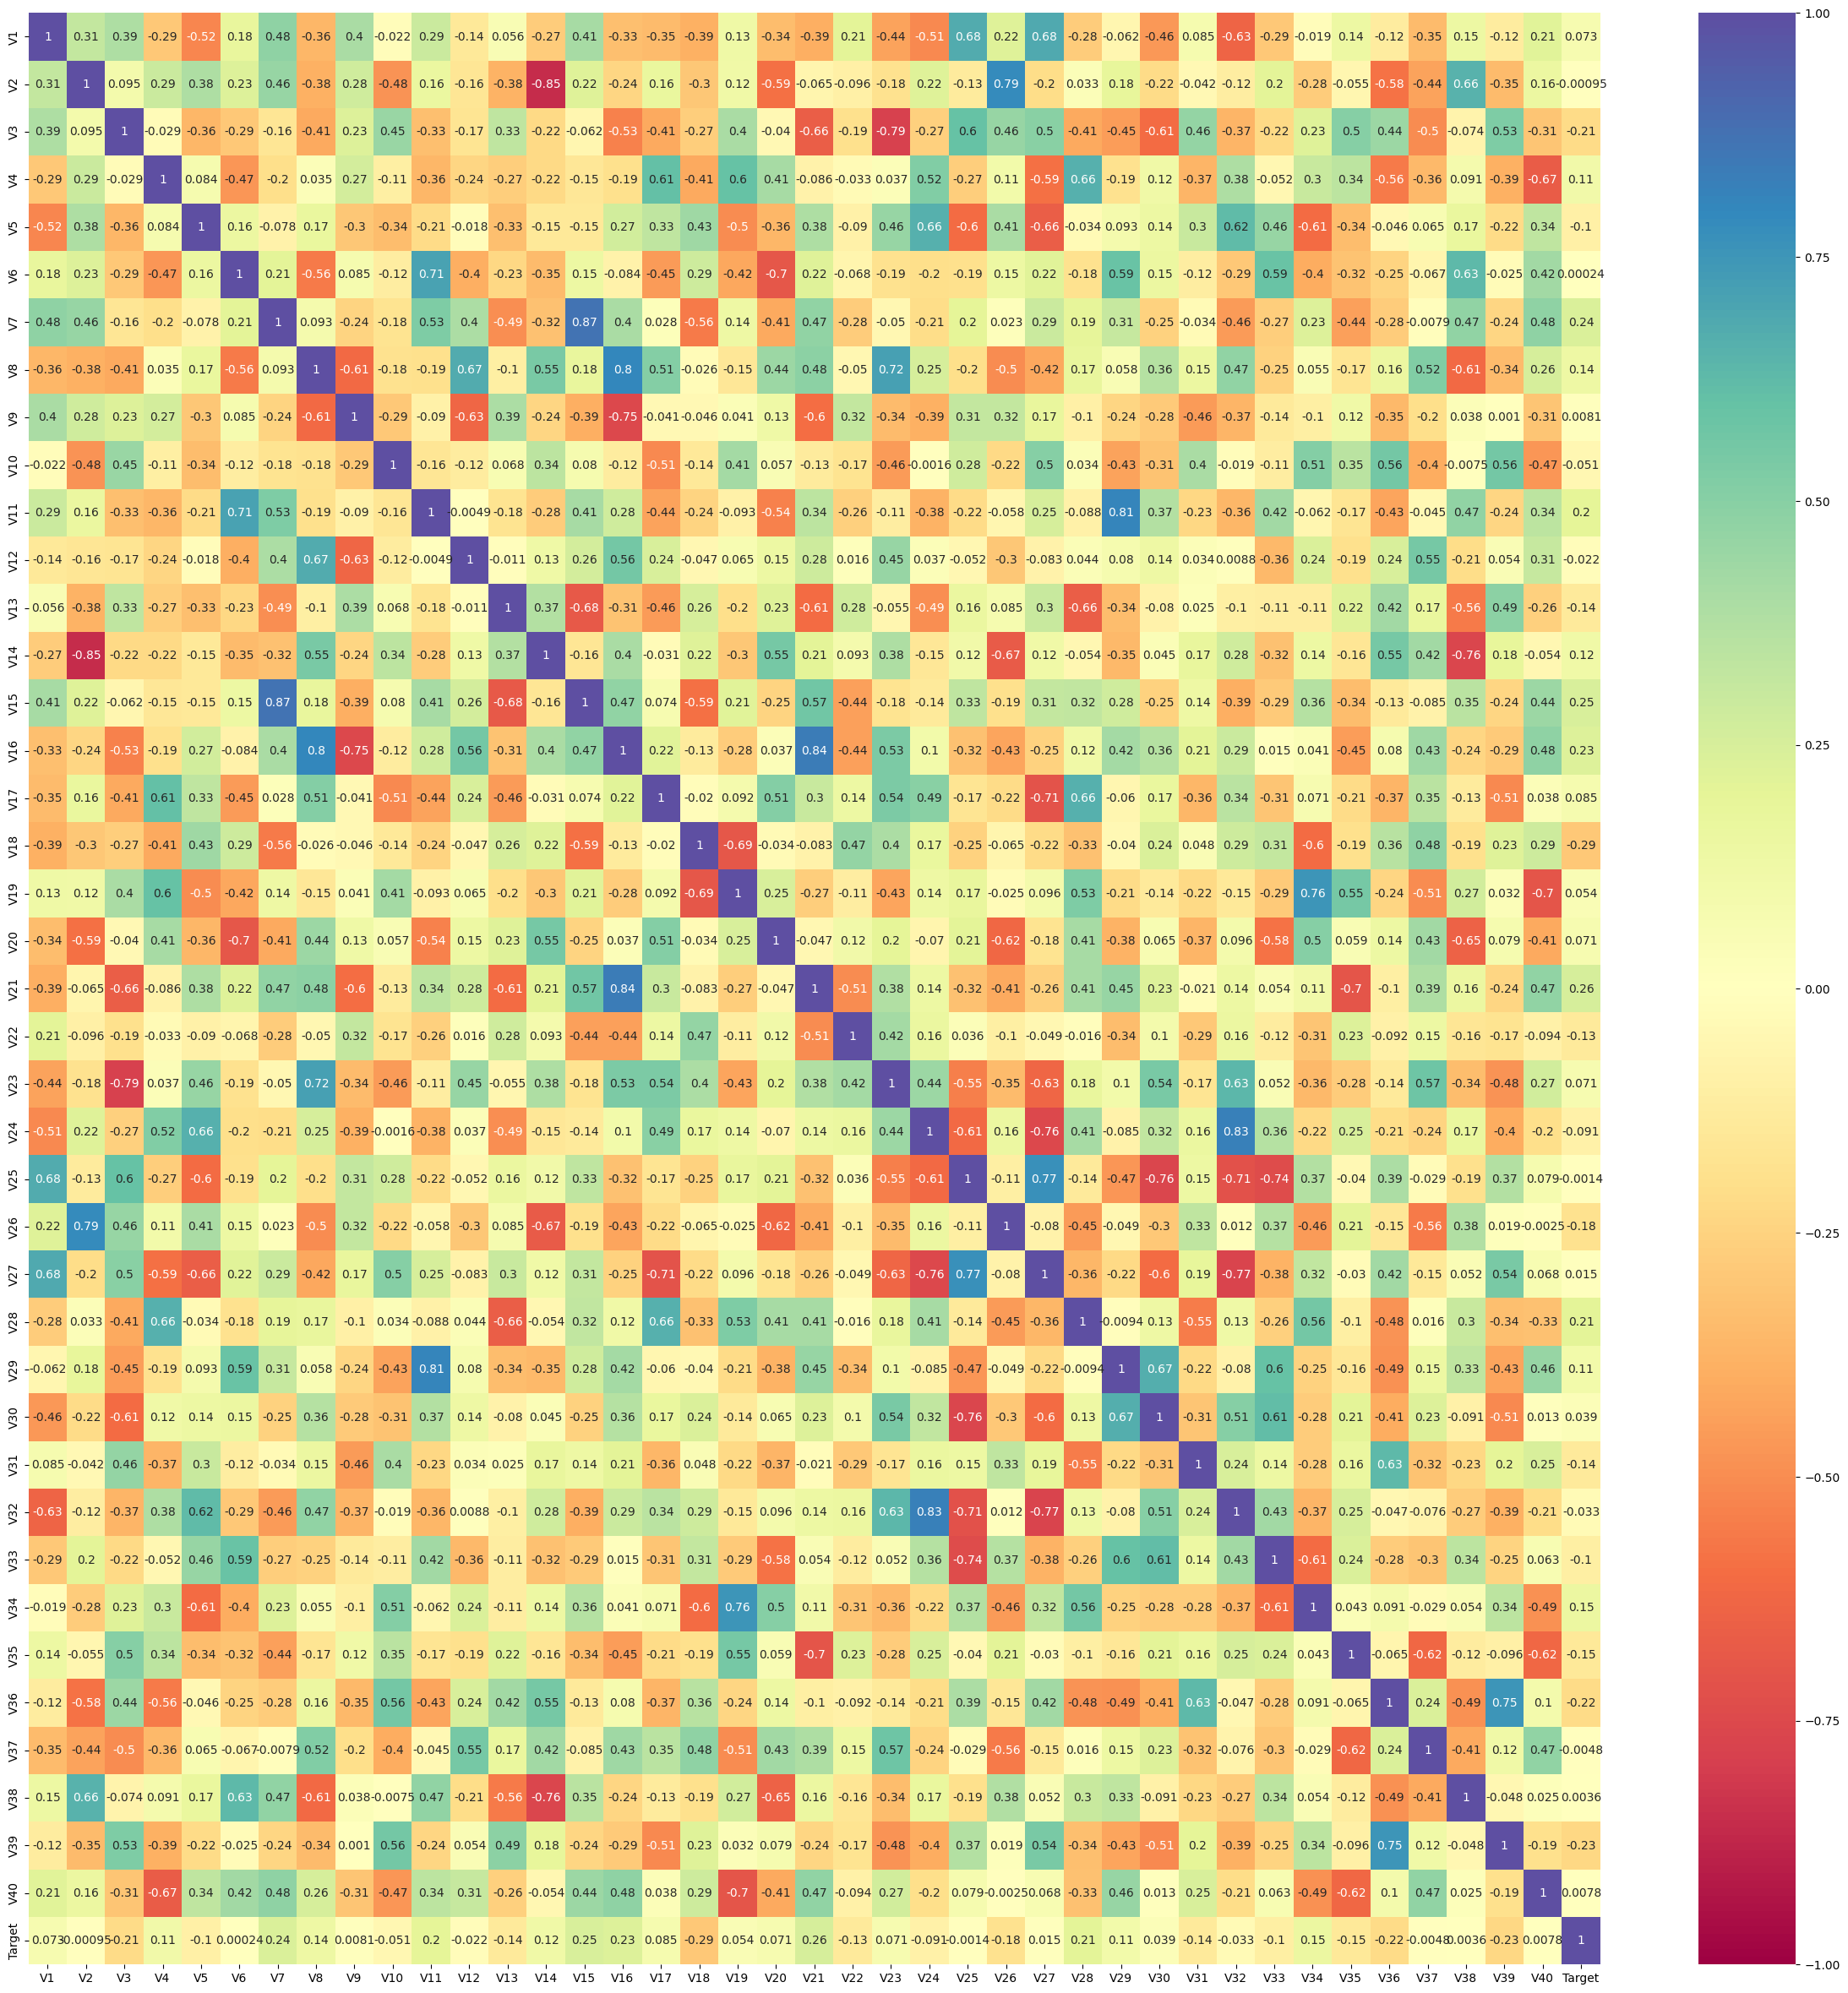

In [ ]:
# plot corrlation values for train dataset
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap='Spectral',vmin=-1,vmax=1);

* There is not a strong correlation with the target variable and any sensors.
* Sensors with a strong negative correlation are V2 and V14, V3 & V23, and V27 & V32.
* Sensors with a strong positive correlation are V7 & V16, V16 & V21, and V24 & V32.

# Data Preparation for Modeling

In [ ]:
# create x & y variable sets for original train dataset
X=df.drop(['Target'],axis=1)
y=df['Target']

In [ ]:
# create x & y test dataset
X_test=dftest.drop(['Target'],axis=1)
y_test=dftest['Target']

We have a separate file for the test dataset. Thus we only need to split the train into train and validation sets.

In [ ]:
# split the original dataset into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=1, stratify=y
)

print(X_train.shape, X_val.shape, X_test.shape)

(15000, 40) (5000, 40) (5000, 40)


In [ ]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15000
Number of rows in validation data = 5000
Number of rows in test data = 5000


### Missing value imputation




* V1 & V2 are missing a very few values. Could use simple imputer, but will use KNN to get better fit imputed values.

In [ ]:
# defining the KNN imputer using the 5 nearest neighbor values
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ['V1', 'V2']

# Fit and transform the train data
X_train[reqd_col_for_impute] = imputer.fit_transform(X_train[reqd_col_for_impute])

# Transform the train data
X_val[reqd_col_for_impute] = imputer.transform(X_val[reqd_col_for_impute])

# Transform the test data
X_test[reqd_col_for_impute] = imputer.transform(X_test[reqd_col_for_impute])

In [ ]:
# total null values in train
X_train.isnull().sum().sum()

0

In [ ]:
# total null values in train
print('X train missing values: ', X_train.isnull().sum().sum())

# total null values in validation
print('X validation missing values: ', X_val.isnull().sum().sum())
# total null values in train
print('X test missing values: ', X_val.isnull().sum().sum())

X train missing values:  0
X validation missing values:  0
X test missing values:  0


* All missing values have been treated.

# Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.
- Cross validaiton: We will evaluate model performance via KFold and cross validation score instead of simple train test validation. This will reduce the performance variance that can be associate with simple train test validation.

In [ ]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

### Initial Models

In [ ]:
models = []  # Empty list to store all future models

# Appending new model into the list
models.append(("logistic", LogisticRegression(random_state=1)))
models.append(("decision tree", DecisionTreeClassifier(random_state=1)))
models.append(("random forest", RandomForestClassifier(random_state=1)))
models.append(("bagging", BaggingClassifier(random_state=1)))
models.append(("adaboost", AdaBoostClassifier(random_state=1)))
models.append(("gradient boosting", GradientBoostingClassifier(random_state=1)))
models.append(("xgboost", XGBClassifier(random_state=1, eval_metric='logloss')))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation recall performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Cross-Validation recall performance on validation dataset:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))



Cross-Validation recall performance on training dataset:

logistic: 0.4927566553639709
decision tree: 0.6982829521679532
random forest: 0.7223144073299184
bagging: 0.7210807301060529
adaboost: 0.6309140754635308
gradient boosting: 0.7066589712141981
xgboost: 0.8172426231873603

Cross-Validation recall performance on validation dataset:

logistic: 0.48201438848920863
decision tree: 0.7050359712230215
random forest: 0.7266187050359713
bagging: 0.7302158273381295
adaboost: 0.6762589928057554
gradient boosting: 0.7230215827338129
xgboost: 0.8309352517985612


Model Observations:
- Logistic model is simply underfitting on the datasets.
- Decision tree, random forest, bagging classifier, gradient boosting, and XG boost are well balanced performing models on train and validation sets.
- Best model currently is XG Boost, but also is a complex and computationally instensive.

### Oversampled Data Models


**Approach** - Oversampling the data is good technique for imbalanced data. We will synthesize data to balance the dependent variable. Thus, no loss of information.

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

# dependent variable distribution before oversampling
print("Before Oversampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# dependent variable distribution after oversampling
print("After Oversampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label '1': 832
Before Oversampling, counts of label '0': 14168 

After Oversampling, counts of label '1': 14168
After Oversampling, counts of label '0': 14168 

After Oversampling, the shape of train_X: (28336, 40)
After Oversampling, the shape of train_y: (28336,) 



* After oversampling, the `Target` variable is balanced to the original majority.

In [ ]:
models = []  # Empty list to store all future models

# Appending new model into the list
models.append(("logistic oversample", LogisticRegression(random_state=1)))
models.append(("decision tree oversample", DecisionTreeClassifier(random_state=1)))
models.append(("random forest oversample", RandomForestClassifier(random_state=1)))
models.append(("bagging oversample", BaggingClassifier(random_state=1)))
models.append(("adaboost oversample", AdaBoostClassifier(random_state=1)))
models.append(("gradient boosting oversample", GradientBoostingClassifier(random_state=1)))
models.append(("xgboost oversample", XGBClassifier(random_state=1, eval_metric='logloss')))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation recall performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Cross-Validation recall performance on validation dataset:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation recall performance on training dataset:

logistic oversample: 0.883963699328486
decision tree oversample: 0.9720494245534969
random forest oversample: 0.9839075010941964
bagging oversample: 0.9762847187883701
adaboost oversample: 0.8978689011775473
gradient boosting oversample: 0.9258892262056152
xgboost oversample: 0.9896949975350997

Cross-Validation recall performance on validation dataset:

logistic oversample: 0.8489208633093526
decision tree oversample: 0.7769784172661871
random forest oversample: 0.8525179856115108
bagging oversample: 0.8309352517985612
adaboost oversample: 0.8561151079136691
gradient boosting oversample: 0.8776978417266187
xgboost oversample: 0.8669064748201439


Oversample Model Observations:
-

### Undersampled Data Models


**Approach** - Undersampling the data is another good technique for imbalanced data. We will decrease the frequency of the majority class. Con is that there is loss of information.

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

# dependent variable distribution before undersampling
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# dependent variable distribution after undersampling
print("After Undersampling, counts of label '1': {}".format(sum(y_train_under == 1)))
print("After Undersampling, counts of label '0': {} \n".format(sum(y_train_under == 0)))


print("After Undersampling, the shape of train_X: {}".format(X_train_under.shape))
print("After Undersampling, the shape of train_y: {} \n".format(y_train_under.shape))

Before Undersampling, counts of label '1': 832
Before Undersampling, counts of label '0': 14168 

After Undersampling, counts of label '1': 832
After Undersampling, counts of label '0': 832 

After Undersampling, the shape of train_X: (1664, 40)
After Undersampling, the shape of train_y: (1664,) 



* After undersampling, the `Target` variable is balanced to the original minority.

In [ ]:
models = []  # Empty list to store all future models

# Appending new model into the list
models.append(("logistic undersample", LogisticRegression(random_state=1)))
models.append(("decision tree undersample", DecisionTreeClassifier(random_state=1)))
models.append(("random forest undersample", RandomForestClassifier(random_state=1)))
models.append(("bagging undersample", BaggingClassifier(random_state=1)))
models.append(("adaboost undersample", AdaBoostClassifier(random_state=1)))
models.append(("gradient boosting undersample", GradientBoostingClassifier(random_state=1)))
models.append(("xgboost undersample", XGBClassifier(random_state=1, eval_metric='logloss')))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation recall performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_under, y=y_train_under, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Cross-Validation recall performance on validation dataset:" "\n")

for name, model in models:
    model.fit(X_train_under, y_train_under)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation recall performance on training dataset:

logistic undersample: 0.8726138085275232
decision tree undersample: 0.8617776495202367
random forest undersample: 0.9038669648654498
bagging undersample: 0.8641945025611427
adaboost undersample: 0.8666113556020489
gradient boosting undersample: 0.8978572974532861
xgboost undersample: 0.9014717552846114

Cross-Validation recall performance on validation dataset:

logistic undersample: 0.8525179856115108
decision tree undersample: 0.841726618705036
random forest undersample: 0.8920863309352518
bagging undersample: 0.8705035971223022
adaboost undersample: 0.8489208633093526
gradient boosting undersample: 0.8884892086330936
xgboost undersample: 0.8992805755395683


Undersampled Model Observations:
-

## Hyperparameter Tuning

**We will now attempt to improve the overfitting models' performance. We will only hypertune the top 4 overfit models. This may lead to some performance improvement.**

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

### AdaBoost Oversampled Tuned

#### RandomizedSearchCV

* We will utilize RandomizedSearchCV() instead of GridSearchCV() because it is computationally more efficient.

In [ ]:
# list of parameters available for hypertuning
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [ ]:
#defining model
model = AdaBoostClassifier(random_state=1)

#1Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1),
                       DecisionTreeClassifier(max_depth=2, random_state=1),
                       DecisionTreeClassifier(max_depth=3, random_state=1),
                       ]
    }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   scoring=scorer,
                                   cv=5,
                                   n_iter= 20,
                                   n_jobs = -1,
                                   verbose= 2,
                                   )

#Fitting parameters in RandomizedSeachCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'base_estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7644758675420245:


In [ ]:
# Creating new pipeline with best parameters
tuned_adaboost = AdaBoostClassifier(
#    n_estimators = 200,
#    learning_rate = 0.2,
#    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1),
    n_estimators = 250,
    learning_rate = 0.2,
    base_estimator = DecisionTreeClassifier(max_depth=3, random_state=1),
)

# Fit the model on training data
tuned_adaboost.fit(X_train_over, y_train_over)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.2, n_estimators=250)

In [ ]:
# Calculating different metrics on train set
adaboost_over_tuned_train_perf = model_performance_classification_sklearn(
    tuned_adaboost, X_train_over, y_train_over
)
print("Training performance:")
adaboost_over_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.995412,0.993154,0.99766,0.995402


In [ ]:
# Calculating different metrics on validation set
adaboost_over_tuned_val_perf = model_performance_classification_sklearn(
    tuned_adaboost, X_val, y_val
)
print("Validation performance:")
adaboost_over_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.981,0.848921,0.816609,0.832451


### Gradient Boosing Oversampled Tuned

In [ ]:
# list of parameters available for hypertuning
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

#### RandomizedSearchCV

In [ ]:
#defining model
model = GradientBoostingClassifier(random_state=1)

#1 Parameter grid to pass in RandomizedSearchCV
param_grid = {"n_estimators": np.arange(100,150,25),
              "learning_rate": [0.2, 0.05, 1],
              "subsample":[0.5,0.7],
              "max_features":[0.5,0.7]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   scoring=scorer,
                                   cv=5,
                                   n_iter= 20,
                                   n_jobs = -1,
                                   verbose= 2,
                                   )

#Fitting parameters in RandomizedSeachCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9689446464829643:


In [ ]:
# building model with best parameters
tuned_gbm = GradientBoostingClassifier(subsample = 0.7,
                                    n_estimators = 100,
                                    max_features = 0.7,
                                    learning_rate = 1)

'''tuned_gbm = GradientBoostingClassifier(subsample = 0.8,
                                    n_estimators = 200,
                                    max_features = 0.5,
                                    learning_rate = 1)
'''
# Fit the model on training data
tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.7, subsample=0.7)

In [ ]:
# Calculating different metrics on train set
gbm_over_tuned_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over)

print("Training performance:")
gbm_over_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.986131,0.98419,0.988025,0.986104


In [ ]:
# Calculating different metrics on validation set
gbm_over_tuned_val_perf = model_performance_classification_sklearn(tuned_gbm, X_val, y_val)
print("Validation performance:")
gbm_over_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.9556,0.866906,0.565728,0.684659


###  Random Forest Undersampled Tuned

In [ ]:
# list of parameters available for hypertuning
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### RandomizedSearchCV

In [ ]:
#defining model
model = RandomForestClassifier(random_state=1)

#1 Parameter grid to pass in RandomizedSearchCV
param_grid = { "n_estimators": [200,250,300],
              "min_samples_leaf": np.arange(1, 4),
               "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
               "max_samples": np.arange(0.4, 0.7, 0.1),
               }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   scoring=scorer,
                                   cv=5,
                                   n_iter= 20,
                                   n_jobs = -1,
                                   verbose= 2,
                                   )

#Fitting parameters in RandomizedSeachCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters are {'n_estimators': 300, 'min_samples_leaf': 3, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8954043719789337:


In [ ]:
# building model with best parameters
tuned_randomforest = RandomForestClassifier(n_estimators =300,
                                            min_samples_leaf = 3,
                                            max_samples = 0.5,
                                            max_features = 'sqrt')

# Fit the model on training data
tuned_randomforest.fit(X_train_under, y_train_under)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=3, n_estimators=300)

In [ ]:
# Calculating different metrics on train set
rf_under_tuned_train_perf = model_performance_classification_sklearn(
    tuned_randomforest, X_train_under, y_train_under)

print("Training performance:")
rf_under_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.95613,0.929087,0.982211,0.95491


In [ ]:
# Calculating different metrics on validation set
rf_under_tuned_val_perf = model_performance_classification_sklearn(tuned_randomforest, X_val, y_val)
print("Validation performance:")
rf_under_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.931,0.888489,0.440285,0.588796


###  XGBoost Undersampled Tuned

In [ ]:
# list of parameters available for hypertuning
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

#### RandomizedSearchCV

In [ ]:
#defining model
model = XGBClassifier(random_state=1)

#Parameter grid to pass in RandomizedSearchCV
param_grid={'n_estimators': [150, 200, 250],
            'scale_pos_weight': [5,10],
            'learning_rate': [0.1,0.2],
            'gamma': [0,3,5],
            'subsample': [0.8,0.9] }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=model,
                                   param_distributions=param_grid,
                                   scoring=scorer,
                                   cv=5,
                                   n_iter= 40,
                                   n_jobs = -1,
                                   verbose= 2,
                                   )

#Fitting parameters in RandomizedSeachCV
randomized_cv.fit(X_train_under,y_train_under)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9290599523843879:


In [ ]:
# building model with best parameters
tuned_xgb = XGBClassifier(subsample = 0.9,
                          scale_pos_weight = 10,
                          n_estimators = 250,
                          learning_rate = 0.1,
                          gamma = 5)
# Fit the model on training data
tuned_xgb.fit(X_train_under, y_train_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=250, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# Calculating different metrics on train set
xgb_under_tuned_train_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train_under, y_train_under)

print("Training performance:")
xgb_under_tuned_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.972957,1.0,0.948689,0.973669


In [ ]:
# Calculating different metrics on validation set
xgb_under_tuned_val_perf = model_performance_classification_sklearn(tuned_xgb, X_val, y_val)
print("Validation performance:")
xgb_under_tuned_val_perf

Validation performance:


,Accuracy,Recall,Precision,F1
0,0.8262,0.917266,0.231608,0.369833



# Model performance comparison and choosing the final model

- We will only compare the performances of the tuned models as they were the best performing models.

In [ ]:
# training performance comparison
models_train_comp_df=pd.concat([adaboost_over_tuned_train_perf.T,
                                 gbm_over_tuned_train_perf.T,
                                 rf_under_tuned_train_perf.T,
                                 xgb_under_tuned_train_perf.T],
                               axis=1)

models_train_comp_df.columns = [
    "AdaBoost Oversampled Tuned",
    "Gradient Boost Oversampled Tuned",
    "Random Forest Undersampled Tuned",
    "XGBoost Undersampled Tuned",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,AdaBoost Oversampled Tuned,Gradient Boost Oversampled Tuned,Random Forest Undersampled Tuned,XGBoost Undersampled Tuned
Accuracy,0.995412,0.986131,0.956130,0.972957
Recall,0.993154,0.984190,0.929087,1.000000
Precision,0.997660,0.988025,0.982211,0.948689
F1,0.995402,0.986104,0.954910,0.973669


In [ ]:
# validation performance comparison
models_val_comp_df=pd.concat([adaboost_over_tuned_val_perf.T,
                                 gbm_over_tuned_val_perf.T,
                                 rf_under_tuned_val_perf.T,
                                 xgb_under_tuned_val_perf.T],
                               axis=1)

models_val_comp_df.columns = [
    "AdaBoost Oversampled Tuned",
    "Gradient Boost Oversampled Tuned",
    "Random Forest Undersampled Tuned",
    "XGBoost Undersampled Tuned",
]

print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,AdaBoost Oversampled Tuned,Gradient Boost Oversampled Tuned,Random Forest Undersampled Tuned,XGBoost Undersampled Tuned
Accuracy,0.981000,0.955600,0.931000,0.826200
Recall,0.848921,0.866906,0.888489,0.917266
Precision,0.816609,0.565728,0.440285,0.231608
F1,0.832451,0.684659,0.588796,0.369833


Observations:
- If only comparing the tuned models:
  
  The best performing model is the random forest tuned model that was fit on undersampled data. Although slightly overfitting, this model minimizes the false negatives the best.
- If comparing all models:
  
  It should be noted that the XGBoost undersampled model and random forest undersampled did a better job at generalizing. And this was before the tuning. Thus tuning was not as helpful in fixing the slight overfitting.
- Per the requirements for the project, we will proceed with the best tuned model - random forest undersampled tuned.

### Test set final performance

In [ ]:
# Calculating different metrics on the test set
rf_under_tuned_test_perf = model_performance_classification_sklearn(tuned_randomforest, X_test, y_test)
print("Test performance:")
rf_under_tuned_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.9386,0.875887,0.475915,0.616729


* Model is performing well.

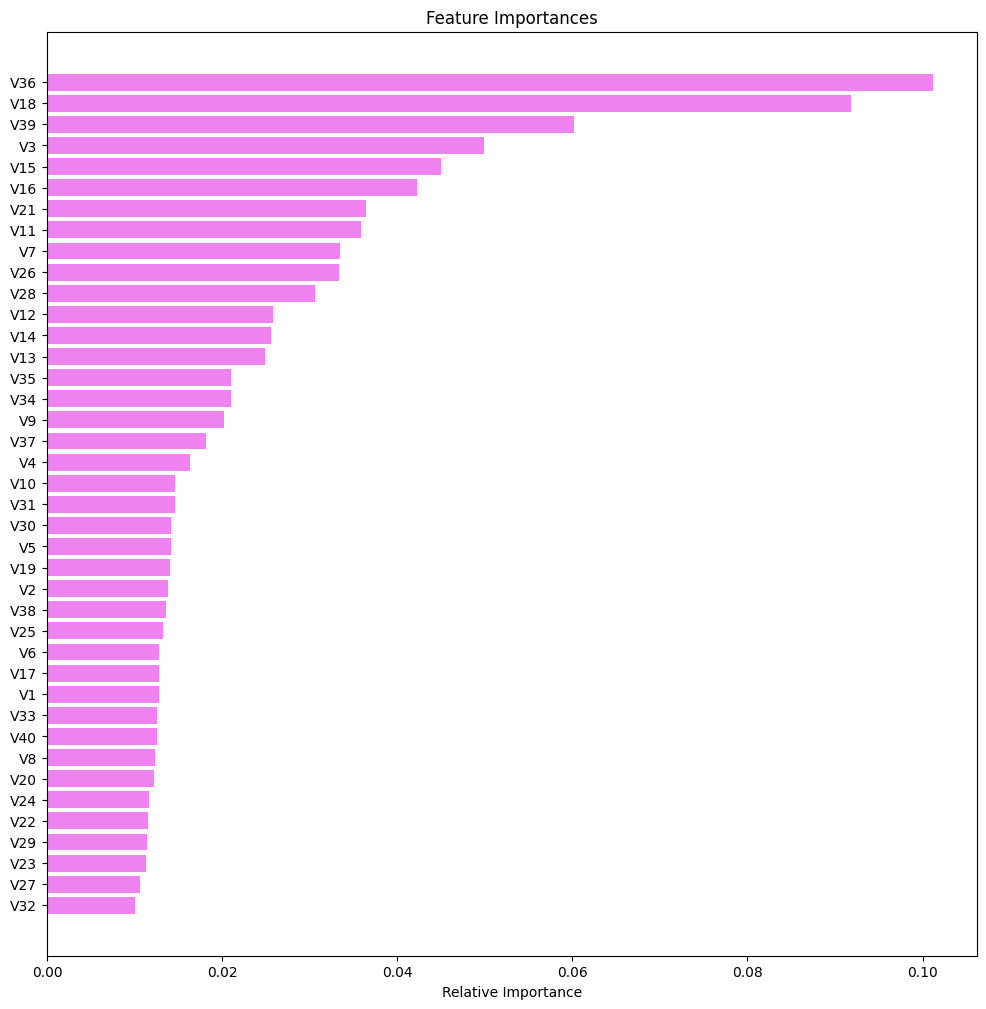

In [ ]:
# graph the feature importance for the best model
feature_names = X.columns
importances = tuned_randomforest.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* V18 is the most important feature/sensor, followed by V36 and V39.

## Pipelines to build the final model


* Lets use pipelines to put the model into production. This will help to standardize the model building process. We must apply the steps in a pipeline to each and every variable.

In [ ]:
# get numerical variables
numerical_features=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31',
       'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])

preprocessor = ColumnTransformer(
    transformers=["num", numeric_transformer, numerical_features])

In [ ]:
# Separating target variable and other variables for train datafile
X_train = df.drop(columns='Target')
Y_train = df['Target']

# We have a separate test datafile, separating target variable and other variables
x_test = dftest.drop(columns='Target')
y_test = dftest['Target']

# Check size of each set
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 20000
Number of rows in test data = 5000


The best model, Random Forest Undersampled Tuned, is built upon undersampled dataset.

In [ ]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_under, Y_under = rus.fit_resample(X_train, Y_train)

In [ ]:
# Creating new pipeline with best parameters
final_pipeline_model = Pipeline(
    steps=[
        ("pre", numeric_transformer),
        ("GBM", RandomForestClassifier(
            n_estimators = 300,
            min_samples_leaf = 3,
            max_samples = 0.5,
            max_features = 'sqrt'),
         ),
        ]
    )


# Fit the model on the underfit training data
final_pipeline_model.fit(X_under, Y_under)

Pipeline(steps=[('pre',
                 Pipeline(steps=[('imputer',
                                  SimpleImputer(strategy='median'))])),
                ('GBM',
                 RandomForestClassifier(max_samples=0.5, min_samples_leaf=3,
                                        n_estimators=300))])

In [ ]:
# Let's check the performance on test set
final_pipeline_model_test = model_performance_classification_sklearn(final_pipeline_model, x_test, y_test)
final_pipeline_model_test

,Accuracy,Recall,Precision,F1
0,0.9438,0.868794,0.501022,0.635538


* The model has a recall of ~86.9%. It is generalizing well! We are able to predict ~86.9% of false negatives. This helps to reduce the impact when there is a real failure where there is no detection by the model.











# Business Insights and Conclusions

**Model Observations**
* This model is generalizing well. It predicts 87.5% of false negatives (where a failure occurrs but was not detected by the model).

* This will help the company save costs on maintenance.

* Normally, we should've picked one of the undersampled models that was highly performing and generalizing well on recall. Such as random forest undersampled model.

**Business Insights**
* Sensors V18, V36, and V39 are important features and the company should focus on the components that are monitored by these sensors. Consistent maintenance on these components can help to reduce failures of the turbines.


***